## This is the second try of numberplate reading model

In [4]:
import cv2
import pytesseract
import imutils

from matplotlib import pyplot as plt

In [5]:
pytesseract.pytesseract.tesseract_cmd = "C:\Program Files\Tesseract-OCR\tesseract.exe"

### Read the image

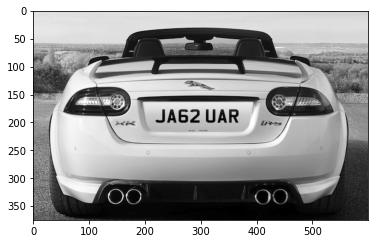

In [38]:
image = cv2.imread("../data/License-plate/images/Cars118.png")
grayImg = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(grayImg,cv2.COLOR_BGR2RGB))

### Smoothing Image

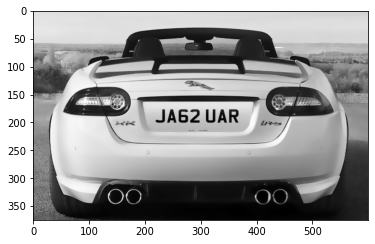

In [39]:
grayImg = cv2.bilateralFilter(grayImg,11,17,17)

plt.imshow(cv2.cvtColor(grayImg,cv2.COLOR_BGR2RGB))

### Finding edges of the picture

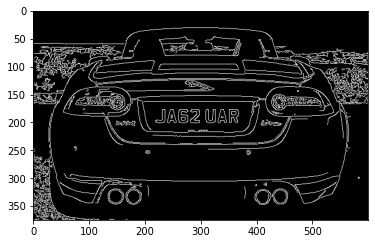

In [40]:
edgeImg = cv2.Canny(grayImg,30,200)

plt.imshow(cv2.cvtColor(edgeImg,cv2.COLOR_BGR2RGB))